<h3><u><center> Defining Problem Statement </center></u></h3>
<ul>
    <li> Jamboree is an education provider that helps students crack internation exams such as GMAT, GRE or SAT </li>
    <li> Jamboree has launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective. </li>
<li> Help Jamboree understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables. </li> 
</ul>

<b> Dataset Definition: </b>

<ul>
    <li> GRE Scores (out of 340) </li>
    <li> TOEFL Scores (out of 120) </li>
    <li> University Rating (out of 5) </li>
    <li> Statement of Purpose and Letter of Recommendation Strength (out of 5) </li>
    <li> Undergraduate GPA (out of 10) </li>
    <li> Research Experience (either 0 or 1) </li>
    <li> Chance of Admit (ranging from 0 to 1) --> Predictor variable </li>
</ul>
    
<b><u> Importing libraries </u></b>

In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools
import warnings
# warnings.filterwarnings("ignore")

In [209]:
data = pd.read_csv("Jamboree_Admission.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [210]:
#dropping columns useless for predictions/insights
data.drop(["Serial No."], axis = 1, inplace = True)

# Some columns names have extra spaces
data.columns = ["GRE", "TOEFL", "University Rating", "SOP", "LOR", "CGPA", "Research", "Admit Chance"]
data.head()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admit Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [211]:
data.shape

(500, 8)

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                500 non-null    int64  
 1   TOEFL              500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Admit Chance       500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


<b> Since we want to implement a linear regression model on our data, which would also require checking of correlation and regression factors, I will not convert features like University rating, SOP and LOR to cateogorical, even though they can be represented as so </b>

In [213]:
data.describe()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admit Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [214]:
for column in ["University Rating", "SOP", "LOR", "Research"]:
    print(f"{column} :\nUnique Values: {data[column].unique()},\nUnique Value Counts: {data[column].nunique()},\n% of total: \n{data[column].value_counts(normalize = True)*100}")
    print("--------------XXX-------------", end = "")
    print()

University Rating :
Unique Values: [4 3 2 5 1],
Unique Value Counts: 5,
% of total: 
3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64
--------------XXX-------------
SOP :
Unique Values: [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5],
Unique Value Counts: 9,
% of total: 
4.0    17.8
3.5    17.6
3.0    16.0
2.5    12.8
4.5    12.6
2.0     8.6
5.0     8.4
1.5     5.0
1.0     1.2
Name: SOP, dtype: float64
--------------XXX-------------
LOR :
Unique Values: [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ],
Unique Value Counts: 9,
% of total: 
3.0    19.8
4.0    18.8
3.5    17.2
4.5    12.6
2.5    10.0
5.0    10.0
2.0     9.2
1.5     2.2
1.0     0.2
Name: LOR, dtype: float64
--------------XXX-------------
Research :
Unique Values: [1 0],
Unique Value Counts: 2,
% of total: 
1    56.0
0    44.0
Name: Research, dtype: float64
--------------XXX-------------


<h3><u> Null Values and Duplicates </u></h3>

In [215]:
data.isna().sum()

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admit Chance         0
dtype: int64

In [216]:
data[data.duplicated() == True]

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admit Chance


<h3><u> Outlier detection </u></h3>

In [217]:
def printoutl(col):
    
    q1 = np.quantile(col, 0.25)
    q2 = np.quantile(col, 0.50)
    q3 = np.quantile(col, 0.75)
    IQR = q3 - q1
    min_outlier = q1 - 1.5*(IQR)
    max_outlier = q3 + 1.5*(IQR)

    return col[(col >= max_outlier) | (col <= min_outlier)].count()

print("Outlier Counts")
print("----------------XXX-----------------")
for col in data.columns:
    count_outliers = printoutl(data[col])
    print(col, ":", count_outliers)

Outlier Counts
----------------XXX-----------------
GRE : 0
TOEFL : 0
University Rating : 0
SOP : 0
LOR : 12
CGPA : 0
Research : 0
Admit Chance : 2


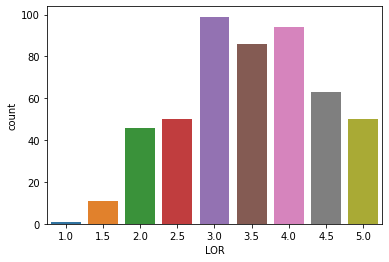

In [218]:
sns.countplot(x = data["LOR"])
plt.show()

<ul>
<li><b> Outliers should be removed if they are truly anomalous values. The outliers in this case seem to represent genuine extreme observations in the data. Therefore, since the outliers are valid and representative of the underlying phenomenon being studied, I feel it is inappropriate to remove them. </b></li>
<li><b> We must also consider the fact that linear regression assumes that residuals are normally distributed and heteroskedacity. Outliers can violate this assumptions. Hence if they impact the model too much, I will remove them at a later stage. </b></li>

<h3><u><center> EDA - Univariate and Bi-variate</center></u></h3>

In [219]:
continuous_cols = ["GRE", "TOEFL", "CGPA", "Admit Chance"]
discrete_cols = data.columns[~data.columns.isin(continuous_cols)]

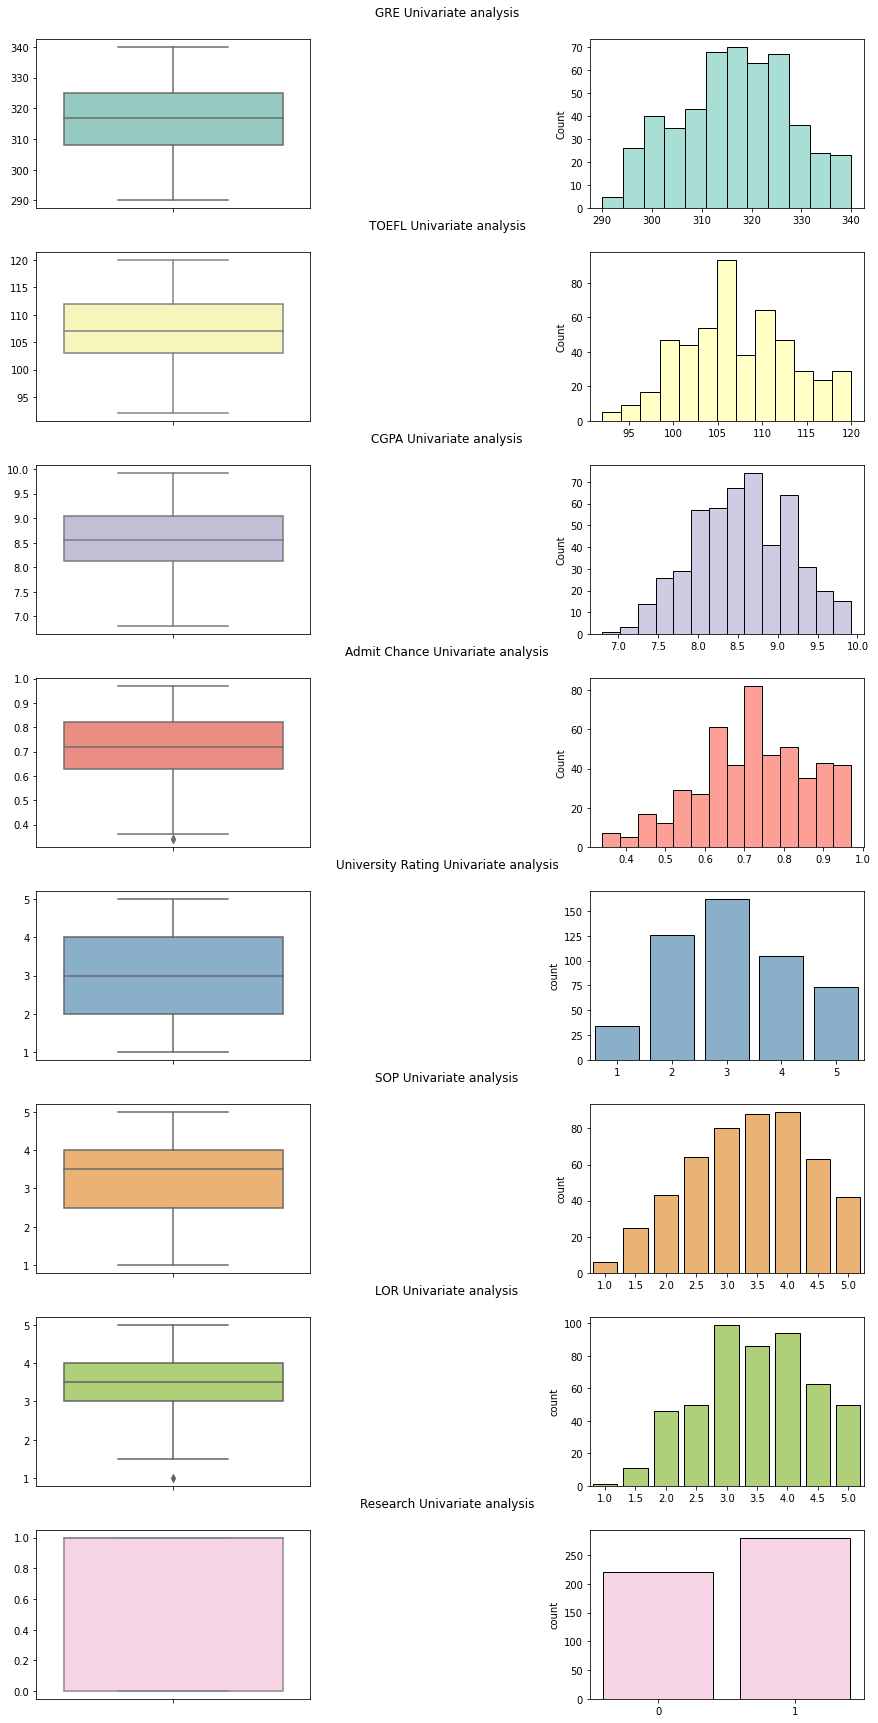

In [220]:
num_features = len(data.columns)
fig, axs = plt.subplots(nrows = num_features,  ncols = 2,  figsize= (6, 3 * num_features))

colors = sns.color_palette("Set3", num_features)
mtpltlib_named_colors = list(mcolors.CSS4_COLORS.keys())

for i, (feature, color) in enumerate(zip(continuous_cols, colors)):
    row = i
    sns.boxplot(data=data, y = feature, ax = axs[row][0], color = color).set(ylabel = "")
    sns.histplot(data=data, x = feature, ax = axs[row][1], bins='auto', color = color).set(xlabel = "")
    axs[row][0].set_title(f"{feature} Univariate analysis", x = 1.5, y = 1.1, fontsize = 12)

new_colors = itertools.islice(colors, i+1, None)

for (feature, color) in zip(discrete_cols, new_colors):
    row = i + 1
    sns.boxplot(data=data, y = feature, ax = axs[row][0], color = color).set(ylabel = "")
    sns.countplot(data=data, x= feature, ax = axs[row][1], color = color, edgecolor = "black").set(xlabel = "")
    axs[row][0].set_title(f"{feature} Univariate analysis", x = 1.5, y = 1.1, fontsize = 12)
    i = i + 1

plt.tight_layout()
plt.subplots_adjust(right = 2)
plt.show()  # Show the plot

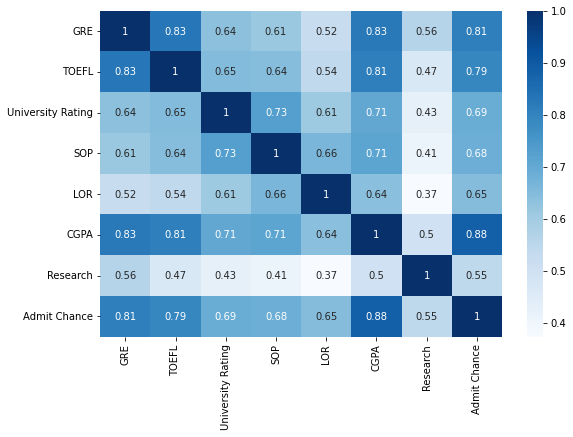

In [221]:
plt.figure(figsize = (9,6))
sns.heatmap(data = data.corr(), cmap='Blues', annot = True)
plt.show()

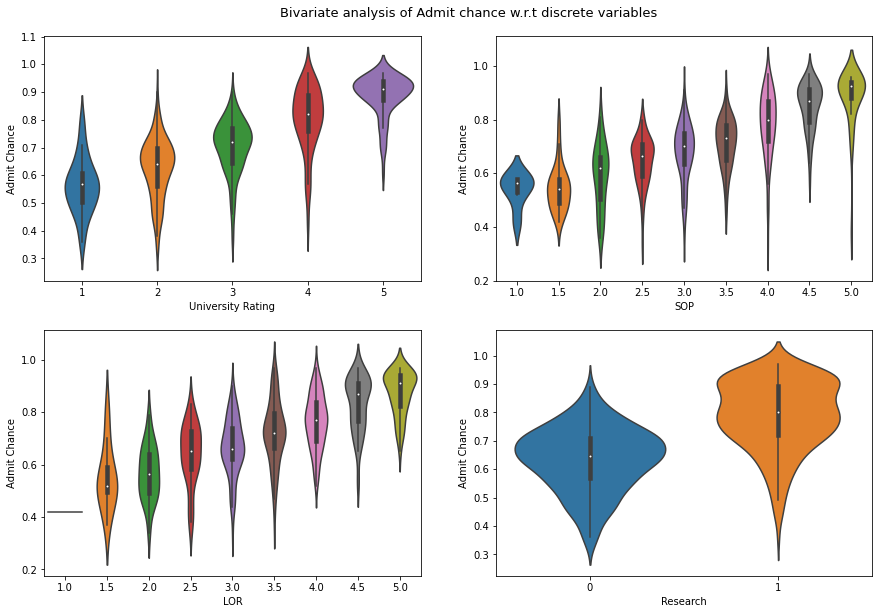

In [222]:
fig, axs = plt.subplots(nrows = 2,  ncols = 2,  figsize=(4, 4))

for i, disc_col in enumerate(discrete_cols):
    row = i // 2
    col = i % 2
    sns.violinplot(data = data, y = "Admit Chance", x = disc_col, ax = axs[row][col])

fig.suptitle("Bivariate analysis of Admit chance w.r.t discrete variables", x = 1.6, y = 2.1, fontsize = 13)
plt.subplots_adjust(right = 3, top = 2)
plt.show()

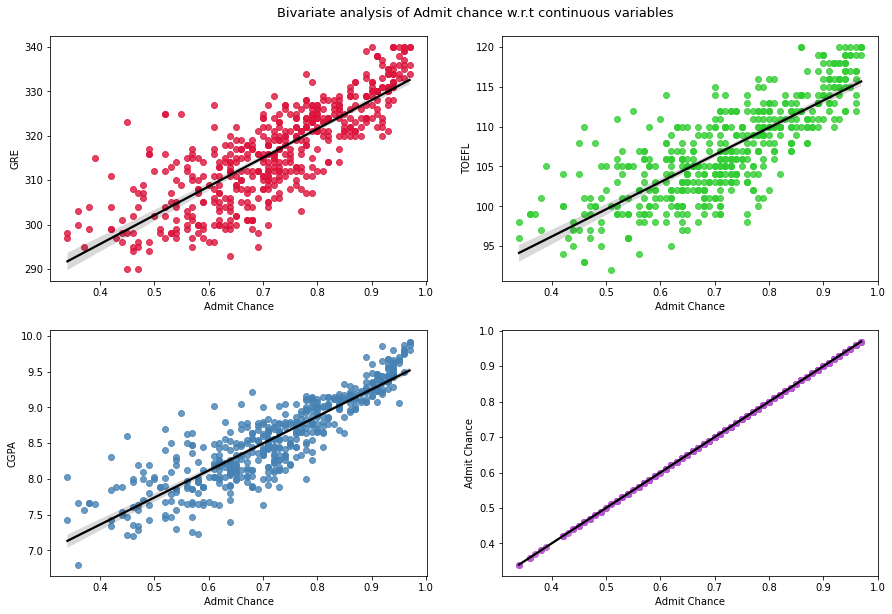

In [223]:
fig, axs = plt.subplots(nrows = 2,  ncols = 2,  figsize=(4, 4))

colors = ["crimson", "limegreen", "steelblue", "mediumorchid"]

for i, cont_col in enumerate(continuous_cols):
    row = i // 2
    col = i % 2
    sns.regplot(data = data, x = "Admit Chance", y = cont_col, ax = axs[row][col], color = colors[i], 
                line_kws = {'color': 'black'})

fig.suptitle("Bivariate analysis of Admit chance w.r.t continuous variables", x = 1.6, y = 2.1, fontsize = 13)
plt.subplots_adjust(right = 3, top = 2)
plt.show()

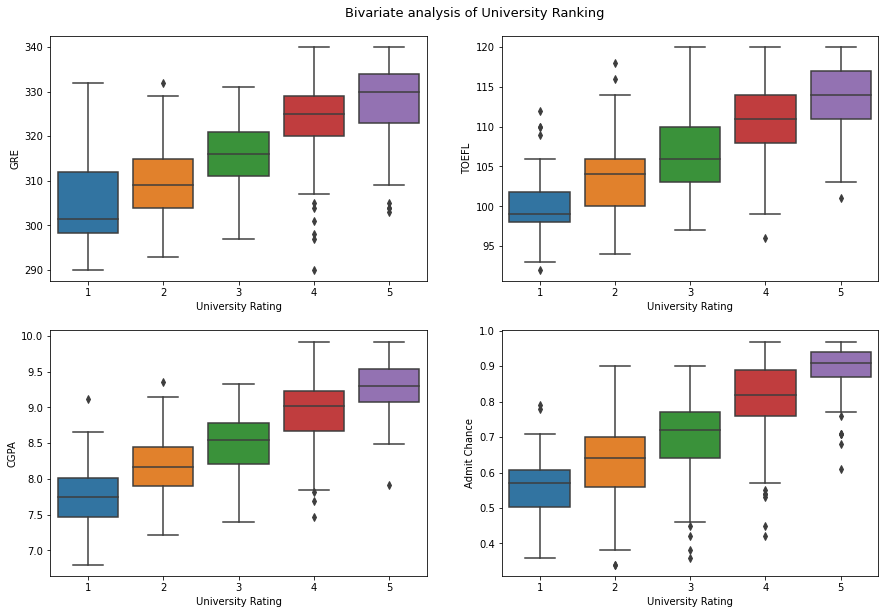

In [224]:
fig, axs = plt.subplots(nrows = 2,  ncols = 2,  figsize=(4, 4))

for i, cont_col in enumerate(continuous_cols):
    row = i // 2
    col = i % 2
    sns.boxplot(data = data, y = cont_col, x = "University Rating", ax = axs[row][col])

fig.suptitle("Bivariate analysis of University Ranking", x = 1.6, y = 2.1, fontsize = 13)
plt.subplots_adjust(right = 3, top = 2)
plt.show()

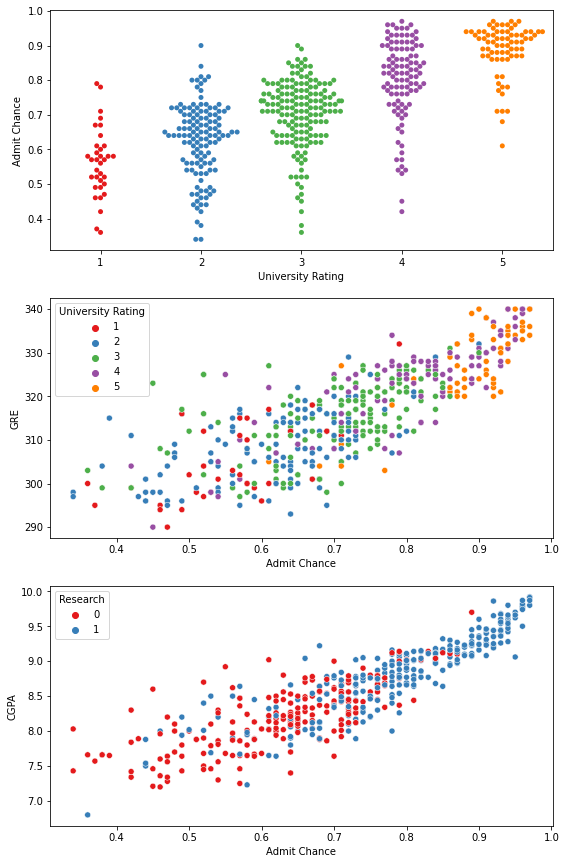

In [225]:
fig, axs = plt.subplots(nrows = 3,  ncols = 1,  figsize=(9, 15))
sns.swarmplot(data = data, y = 'Admit Chance', x = 'University Rating', palette="Set1", ax = axs[0])
sns.scatterplot(data = data, x = 'Admit Chance', y = 'GRE', hue = 'University Rating', palette="Set1", ax = axs[1])
sns.scatterplot(data = data, x = 'Admit Chance', y = 'CGPA', hue = 'Research', palette="Set1")

plt.show()

<h3><u> Observations</u></h3>
<ol>
    <li> Data has no null or duplicate values, outliers are very low in number and represent real data</li>
    <li> Data can be divided into discrete and continous columns. Columns such as 'University Rating', 'SOP', 'LOR', 'Research', represent limited values within a fixed range; whereas, features like GRE and TOEFL are also discrete in nature, they have a lot of values </li>
    <li> All features are highly correlated except for research. This is expected as if a student performs well academics, then in general his/her SOP/LOR/Test Scores and CGPA will be high. Research is the outlier as a student can choose to get into research or spend their time performing other activities</li>
</ol>

<ul>
    <li><b> Discrete Data </b></li>
    <ol>
        <li> <b> University Rating: </b> Most students have graduated from universities having rating from 2-4 with very few student's from lower tiered universities trying for higher education. As seen from the boxplots, students who graduate from high rated universities have much better scores on almost all predictor variables as compared to students who don't. However, the spread in the data distribution is huge, and we can observe that students from low tiered universities are also performing well to boost their admit chances and vice-versa </li>
        <li> <b> SOP & LOR: </b> SOP has an even, bell-shaped distribution with SOP strength of 2,3,4 representing ~85% of the distribution. LOR has a little more skewed distribution with very few students having low LOR scores. From the violinplots, we see having an SOP score of more than 4 represents a large portion of students that have more than a 80% chance of admit. This relationship is less apparent with LORs with a higher percentage of students having &lt 3.5 managing to get good admit percentages  </li>
        <li> <b> Research: </b> We can see that students having not done any research work have a median of 65% admit chance whereas those who have done research have a median of 85% admit chance. The violin plots cements the fact that students who have performed research signify a significant proportion of those who have a &gt 90% chance of getting an admit of their choice </li>
    </ol>
    <br>
    <li><b> Continous Data </b></li>
    <ol>
        <li> <b> GRE & TOEFL: </b> These 2 scores are extremely correlated with each other. This fact is explainable as GRE has half weightage for the English language that the TOEFL tests too. Hence there is quite a big overlap. The scatterplot shows a clear trend in that having higher GRE & TOEFL scores can lead to better admit chances. TOEFL scores are a bit more spread out and both contain a few outliers</li>
        <li> <b> CGPA : </b> Another feature that represents the highest correlation with our target variable. CGPA, GRE, and TOEFL are all representations of academic ability and according to the graphs, education institutes give a lot of importance to them</li>
        <li> CGPA, GRE are skewed in the centre - indicating a higher concentration of values near the mean and heavier tails compared to the normal distribution. This shows that these distributions have a <b>leptokurtic </b>nature. SOP & LOR are heavier tailed distributions</li>
    </ol>
</ul>

<h3><u><center>Data Pre-processing</center></u></h3>

<b><u> Notes: </u></b>
1. Straified K-Fold takes class information into account to avoid building folds with imbalanced class distributions (for binary or multiclass classification tasks). <b>Since we are performing regression analysis, stratified K-Fold is not used</b>
2. StandardScaler is useful for the features that follow a Normal distribution. MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge (e.g. pixel intensities that go from 0 to 255 in the RGB color range).

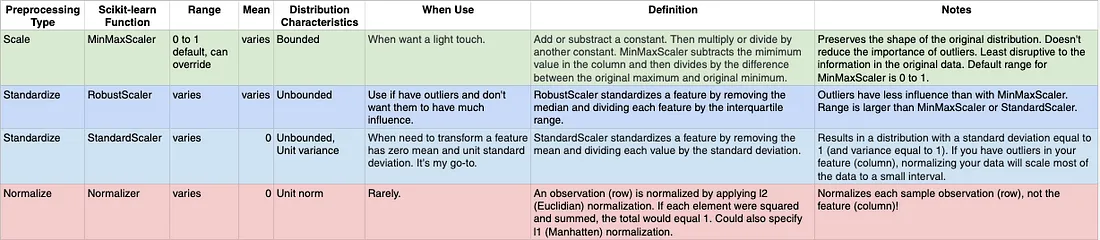

In [226]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [227]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
xTrain, xTest, yTrain, yTest = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 9, shuffle = True)
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

scaler = StandardScaler()
xTrain_Scaled = scaler.fit_transform(xTrain)
xTrain_Scaled_df = pd.DataFrame(data = scaler.fit_transform(xTrain), columns = xTrain.columns, index = xTrain.index)
xTest_Scaled = scaler.transform(xTest)
xTest_Scaled_df = pd.DataFrame(data = scaler.transform(xTest), columns = xTest.columns, index = xTest.index)

print("x----------------------x-----------------------x")
print("Range of Original data")
print("x----------------------x-----------------------x")
print(np.ptp(xTrain, axis = 0))
print("x----------------------x-----------------------x")
print("Mean of Original data")
print("x----------------------x-----------------------x")
print(np.mean(xTrain, axis = 0))
print("x----------------------x-----------------------x")
print("Range of Scaled data")
print("x----------------------x-----------------------x")
print(np.ptp(xTrain_Scaled_df, axis = 0))
print("x----------------------x-----------------------x")
print("Mean of Scaled data")
print("x----------------------x-----------------------x")
print(np.mean(xTrain_Scaled_df, axis = 0).round(2))

(400, 7) (400,) (100, 7) (100,)
x----------------------x-----------------------x
Range of Original data
x----------------------x-----------------------x
GRE                  50.00
TOEFL                28.00
University Rating     4.00
SOP                   4.00
LOR                   4.00
CGPA                  3.12
Research              1.00
dtype: float64
x----------------------x-----------------------x
Mean of Original data
x----------------------x-----------------------x
GRE                  316.645000
TOEFL                107.260000
University Rating      3.092500
SOP                    3.346250
LOR                    3.455000
CGPA                   8.574275
Research               0.562500
dtype: float64
x----------------------x-----------------------x
Range of Scaled data
x----------------------x-----------------------x
GRE                  4.456495
TOEFL                4.625263
University Rating    3.476364
SOP                  4.086239
LOR                  4.321547
CGPA           

<h3><u><center>Baseline Model Building</center></u></h3>

In [248]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

sm_xTrain_Scaled_df = xTrain_Scaled_df.copy()
sm_xTrain_Scaled_df = add_constant(sm_xTrain_Scaled_df) #statsmodel requires constant column seperately

sm_model = sm.OLS(yTrain, sm_xTrain_Scaled_df) #in sm predictor goes first. 
res = sm_model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Admit Chance   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     258.9
Date:                Fri, 23 Jun 2023   Prob (F-statistic):          9.94e-143
Time:                        18:06:47   Log-Likelihood:                 557.53
No. Observations:                 400   AIC:                            -1099.
Df Residuals:                     392   BIC:                            -1067.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7199      0.00

In [229]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred, predictors):

    n = len(y_true)  # number of samples
    p = predictors  # number of predictors

    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print('explained_variance:', round(explained_variance, 4))    
    print('mean_squared_log_error:', round(mean_squared_log_error, 4))
    print('r2:', round(r2, 4))
    print('adjusted_r2:', round(adjusted_r2, 4))  
    print('MAE:', round(mean_absolute_error, 4))
    print('MSE:', round(mse, 4))
    print('RMSE:', round(np.sqrt(mse), 4))

In [230]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xTrain_Scaled, yTrain)
y_preds = model.predict(xTrain_Scaled)
regression_results(yTrain, y_preds, xTrain_Scaled.shape[1])
pd.DataFrame(data = np.insert(model.coef_, 0, model.intercept_), 
            index = sm_xTrain_Scaled_df.columns.tolist(), #keeping feature list same as that for statsmodel results
            columns = ["Co-efficients"])

explained_variance: 0.8222
mean_squared_log_error: 0.0014
r2: 0.8222
adjusted_r2: 0.819
MAE: 0.0426
MSE: 0.0036
RMSE: 0.06


,Co-efficients
const,0.719850
GRE,0.023553
TOEFL,0.018789
University Rating,0.012394
SOP,-0.002560
LOR,0.016078
CGPA,0.067937
Research,0.010428


<u><b>L1 Regularization (Lasso Regression) - Feature Selection</b></u>

In [231]:
from sklearn.linear_model import Lasso

model = Lasso(alpha = 0.05)
model.fit(xTrain_Scaled, yTrain)
y_preds = model.predict(xTrain_Scaled)
regression_results(yTrain, y_preds, xTrain_Scaled.shape[1])
L1_coefs = pd.DataFrame(data = np.insert(model.coef_, 0, model.intercept_), 
            index = ["Constant"] + xTrain_Scaled_df.columns.tolist(), #alternatively I can do this too
            columns = ["Co-efficients"])
L1_coefs

explained_variance: 0.6648
mean_squared_log_error: 0.0025
r2: 0.6648
adjusted_r2: 0.6588
MAE: 0.0645
MSE: 0.0068
RMSE: 0.0824


,Co-efficients
Constant,0.719850
GRE,0.011599
TOEFL,0.001595
University Rating,0.000000
SOP,0.000000
LOR,0.000000
CGPA,0.064377
Research,0.000000


<u><b>L2 Regularization (Ridge Regression)</b></u>

In [232]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 1)
model.fit(xTrain_Scaled, yTrain)
y_preds = model.predict(xTrain_Scaled)
regression_results(yTrain, y_preds, xTrain_Scaled.shape[1])
pd.DataFrame(data = np.insert(model.coef_, 0, model.intercept_), 
            index = ["Constant"] + xTrain_Scaled_df.columns.tolist(), 
            columns = ["Co-efficients"])    

explained_variance: 0.8222
mean_squared_log_error: 0.0014
r2: 0.8222
adjusted_r2: 0.819
MAE: 0.0426
MSE: 0.0036
RMSE: 0.06


,Co-efficients
Constant,0.719850
GRE,0.023720
TOEFL,0.018922
University Rating,0.012404
SOP,-0.002322
LOR,0.016121
CGPA,0.067303
Research,0.010448


<h3><u><center>Testing Assumptions of Linear Regression </center></u></h3>


| Sr.No | Assumption | Test |
| --- | --- | --- |
| 1 | Predictors (x) are independent (no-multicolinearity) and observed with negligible error | Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) |
| 2 | Linearity of variables - There is a linear relationship between the predictors (x) and the outcome (y) | Residual v/s Actual Plot should not have a pattern |
| 3 | The mean of residuals is nearly zero | Calculate Mean of Residuals |
| 4 | Residual Errors have constant variance - No Heteroscedasticity | Residual v/s Actual Plot should not have a pattern |
| 5 | Combining pt.4 and pt.5 --> Residuals must be normally distributed (bell-curve) | Almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line |

<br><b><u> Notes: </u></b>
<ol>
    <li>In the following article : <a href="https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python">V.I.F statsmodel add_constant</a>, statsmodel implementation of VIF expects the presence of a constant in the matrix of explanatory variables. Therefore, we need to use add_constant from statsmodels to add the required constant to the dataframe before passing its values to the function.</li>
    <li>Features having high VIF (>5) means that they can be <b>predicted by other independent variables in the dataset</b>.</li> 
    <li> Removing features after VIF check will <b>never lead to an increase in R2 Score</b>. This is because we are decreasing model complexity when we remove features and, the model's learning will always <b> remain same or less than what was before feature removal</b></li>
    <li>The square root of the variance inflation factor indicates how much larger the standard error increases compared to if that variable had 0 correlation to other predictor variables in the model.</li>
    <li><b>Example</b>: If the variance inflation factor of a predictor variable were 5.27 (√5.27 = 2.3), this means that the standard error for the coefficient of that predictor variable is 2.3 times larger than if that predictor variable had 0 correlation with the other predictor variables.</li>
    <li>There are some <b>hypothesis tests for checking Heteroskedasticity</b> - <a href="https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab">Breusch-Pagan and White tests</a>,  <a href="https://stackoverflow.com/questions/30061054/ols-breusch-pagan-test-in-python">Full implementation</a></li>

### V.I.F Check

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [249]:
# calculating VIF for each feature
# variance_inflation_factor takes input as (all values in df, i'th column for which we are calc VIF)
pd.DataFrame(data = [variance_inflation_factor(sm_xTrain_Scaled_df, i) for i in range(0, sm_xTrain_Scaled_df.shape[1])], 
            index = sm_xTrain_Scaled_df.columns.tolist(), 
            columns = ["VIF"])               

,VIF
const,1.000000
GRE,4.662889
TOEFL,3.920767
University Rating,2.803090
SOP,3.082703
LOR,2.006346
CGPA,5.017933
Research,1.485910


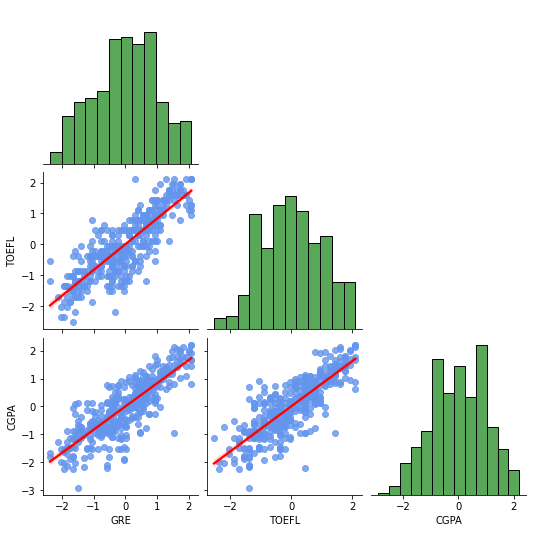

In [251]:
sns.pairplot(data = sm_xTrain_Scaled_df, kind = "reg", vars = ["GRE", "TOEFL", "CGPA"], corner=True, 
             diag_kind="hist", diag_kws={'color':'forestgreen'}, plot_kws={'line_kws':{'color':'red'}, 'color':'cornflowerblue'})
plt.show()

### Residual check

In [236]:
residuals = yTrain - y_preds #assumption check is always done on training data

In [237]:
print("Mean of Residuals:", np.round(residuals.mean(), 3))
print("Std.dev Residuals:", np.round(residuals.std(), 1))

Mean of Residuals: -0.0
Std.dev Residuals: 0.1


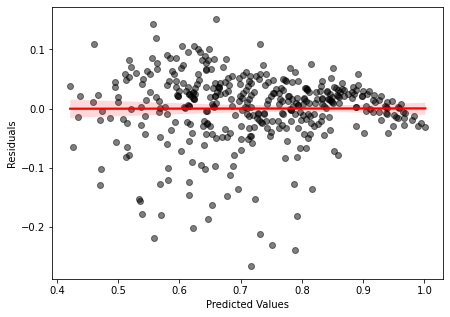

In [238]:
plt.figure(figsize = (7, 5))
sns.regplot(x = y_preds, y = residuals, scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"}, ci = 95).set(xlabel = "Predicted Values", ylabel = "Residuals")
plt.show()

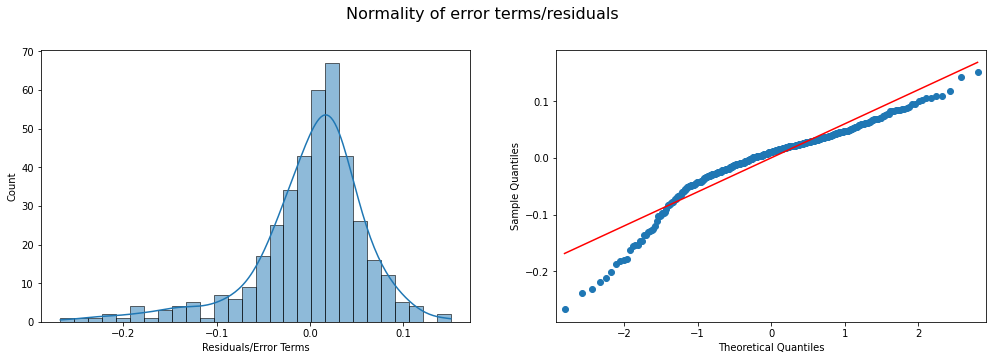

In [239]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (7,5))
sns.histplot(x = residuals,kde=True, ax = axs[0]).set(xlabel = "Residuals/Error Terms")
sm.qqplot(residuals, line='s', ax = axs[1])
# “s” - standardized line, the expected order statistics are scaled by the standard deviation of the 
# given sample and have the mean added to them
fig.suptitle('Normality of error terms/residuals', x = 1, y = 1, fontsize = 16)

plt.subplots_adjust(right = 2)
plt.show()

In [240]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

white_test = het_white(residuals, sm_xTrain_Scaled_df)
bp_test = het_breuschpagan(residuals, sm_xTrain_Scaled_df)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
white_res = dict(zip(labels, bp_test))
bp_res = dict(zip(labels, white_test))

if(white_res['F-Test p-value'] < 0.05 or bp_res['F-Test p-value'] < 0.05):
    print("Heteroskedastic")
    print("white_res: F-Test p-value = {}".format(white_res['F-Test p-value']))
    print("bp_res: F-Test p-value = {}".format(bp_res['F-Test p-value']))
else:
    print("Not Heteroskedastic")

Heteroskedastic
white_res: F-Test p-value = 0.0022201238647138926
bp_res: F-Test p-value = 0.0017854422305970082


<b><u> Insights: </u></b>
1. As we saw in the heatmap, CGPA and GRE are highly correlated with each other. This is one of the major reasons they have a high VIF. 
2. To deal with high VIF values we can use feature engineering to combine correlated variables into a single correlated variable or drop the highest VIF valued features one-by-one
3. Performing L1 Regularization, we are seeing that GRE, TOEFL, and CGPA are the only features selected. This means we should not drop them
4. Model seems to think SOP is a useless feature based on its co-efficient, we can drop it and check results

<b><u> Proposed Solution: </u></b>

<b>1. We will drop SOP column </b>
<br>2. In our case, GRE, TOEFL and CGPA are highly correlated features. We know that all these features test the academic proficiency of an aspirant. Hence, we can <b>combine them into one feature</b>. To do this, <b>I will use the feature importances given by L1 regularization</b> as it only selects the best features

<h3><u><center> Feature Engineering & Re-Building Model </center></u></h3>

In [241]:
total = L1_coefs.loc["GRE"] + L1_coefs.loc["TOEFL"] + L1_coefs.loc["CGPA"]
cgpa_weight =  L1_coefs.loc["CGPA"]/total
gre_weight =  L1_coefs.loc["GRE"]/total
toefl_weight =  L1_coefs.loc["TOEFL"]/total

sm_xTrain_Scaled_df["Academics"] = (sm_xTrain_Scaled_df["GRE"]*gre_weight[0]) + \
                                    (sm_xTrain_Scaled_df["TOEFL"]*toefl_weight[0]) + \
                                    (sm_xTrain_Scaled_df["CGPA"]*cgpa_weight[0])
sm_xTrain_Scaled_df.drop(["SOP", "GRE", "TOEFL", "CGPA"], axis = 1, inplace = True)
pd.DataFrame(data = [variance_inflation_factor(sm_xTrain_Scaled_df, i) for i in range(0, sm_xTrain_Scaled_df.shape[1])], 
            index = sm_xTrain_Scaled_df.columns.tolist(), 
            columns = ["VIF"]) 

,VIF
const,1.000000
University Rating,2.276221
LOR,1.826997
Research,1.400929
Academics,2.659026


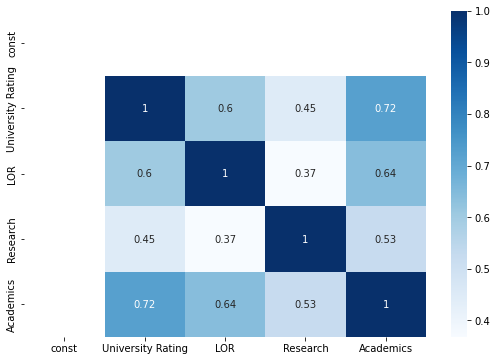

In [242]:
plt.figure(figsize = (9,6))
sns.heatmap(data = sm_xTrain_Scaled_df.corr(), cmap='Blues', annot = True)
plt.show()

In [243]:
sm_model_upd = sm.OLS(yTrain, sm_xTrain_Scaled_df) #in sm predictor goes first. I am using VIF_df as it already has constant col
res = sm_model_upd.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Admit Chance   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     434.8
Date:                Fri, 23 Jun 2023   Prob (F-statistic):          3.31e-143
Time:                        18:05:55   Log-Likelihood:                 549.50
No. Observations:                 400   AIC:                            -1089.
Df Residuals:                     395   BIC:                            -1069.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7199      0.00

In [244]:
model_upd = LinearRegression()

xTrain_Scaled_new = xTrain_Scaled_df.copy()

xTrain_Scaled_new["Academics"] = (xTrain_Scaled_new["GRE"]*gre_weight[0]) + \
                                 (xTrain_Scaled_new["TOEFL"]*toefl_weight[0]) + \
                                 (xTrain_Scaled_new["CGPA"]*cgpa_weight[0])

xTrain_Scaled_new.drop(["SOP", "GRE", "TOEFL", "CGPA"], axis = 1, inplace = True)

model_upd.fit(xTrain_Scaled_new, yTrain)
y_preds_new = model_upd.predict(xTrain_Scaled_new)
regression_results(yTrain, y_preds_new, xTrain_Scaled_new.shape[1])

pd.DataFrame(data = np.insert(model_upd.coef_, 0, model_upd.intercept_), 
            index = ["Constant"] + xTrain_Scaled_new.columns.tolist(), 
            columns = ["Co-efficients"])

explained_variance: 0.8149
mean_squared_log_error: 0.0014
r2: 0.8149
adjusted_r2: 0.813
MAE: 0.0433
MSE: 0.0038
RMSE: 0.0613


,Co-efficients
Constant,0.719850
University Rating,0.014103
LOR,0.013741
Research,0.012674
Academics,0.103869


<h3><u><center>Model performance evaluation - Test Data</center></u></h3>

In [245]:
xTest_Scaled_new = xTest_Scaled_df.copy()
xTest_Scaled_new["Academics"] = (xTest_Scaled_new["GRE"]*gre_weight[0]) + (xTest_Scaled_new["TOEFL"]*toefl_weight[0]) + (xTest_Scaled_new["CGPA"]*cgpa_weight[0])
xTest_Scaled_new.drop(["SOP", "GRE", "TOEFL", "CGPA"], axis = 1, inplace = True)

y_preds_new = model_upd.predict(xTest_Scaled_new)
print("x----------------------x-----------------------x")
print("          Metrics on Test Data (Unseen)")
print("x----------------------x-----------------------x")
regression_results(yTest, y_preds_new, xTest_Scaled_new.shape[1]) 

x----------------------x-----------------------x
          Metrics on Test Data (Unseen)
x----------------------x-----------------------x
explained_variance: 0.823
mean_squared_log_error: 0.0012
r2: 0.821
adjusted_r2: 0.8135
MAE: 0.044
MSE: 0.0033
RMSE: 0.0571


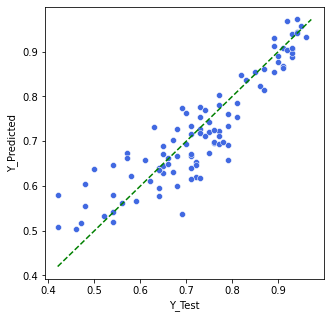

In [246]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = yTest, y = y_preds_new, color = "royalblue").set(
    xlabel = "Y_Test", ylabel = "Y_Predicted")

min_value = min(min(yTest), min(y_preds_new))
max_value = max(max(yTest), max(y_preds_new))

# Plotting a 45-degree line
plt.plot([min_value, max_value], [min_value, max_value], color='green', linestyle='dashed')

plt.show()

<b><u> Insights: </u></b>
<ol>
    <li>Linear Regression without regularization is giving us the best results. An almost equal R2 Score of 0.82 on Train data and Test data is extremely good. MAE, MSE and RMSE all are low, implying our model is not far off from the true prediction values</li>
    <li>Since we have scaled our data, our co-efficients help us determining the feature importances. It shows us that the "Academics" co-efficient is the most significant feature that impact our target variable. We can also see that the constant term is very high, which means even if there were no other features, on average, a student would have a 71.9% chance admit into their college of choice.</li>
    <li> According to our model, the SOP feature has the least impact in prediction. Its co-efficient is negative, meaning a high score is SOP would actually reduce a learner's chances of getting into a good university. </li>
    <li>We removed high multi-colinearity between features by smartly combining them into one feature and avoided data loss while also keeping our metrics intact</li>
    <li>The mean of the residuals is almost 0 and the variance is also constant, there is no pattern as such that is visible from the regplot. Hence, our regression model is approximately Homeoscedastic</li>
    <li>We can see from our evaluation of the error plot that our residuals aren't fully normally distributed. The histogram shows us that residuals are left-skewed (long left tail)</li>
</ol>

<b><u> Recommendations: </u></b>
<ol>
    <li>Firstly, Jamboree needs to <b>add more revelant features</b> for admit chance prediction. We saw that almost all the features were correlated with high V.I.F. This means the data recorded was not adding much to the model in terms of prediction. </li>
    <li>Features like Gender, Extra-Curriculars, Certifications, Achievements, etc. can be added to provide a more holistic understanding of the candidate instead of <b>focussing too much on academic parameters</b></li>
    <li>Students should try to build up on their academic scores as much as possible. We saw that even those students studying in lower rated unversities but had high scores in academics got high acceptance chances. This is corroborated by the high co-efficient of academics from our model</li>
    <li>We still had highly correlated features even after feature engineering. SOP, University Rating still had high VIF values and were showing correlation with Academics. According to my boxplots in EDA, students studying in high rated universities have significantly high academic scores as compared to those who don't. Therefore, there is still scope of <b> Combining University Rating with Academics using some maths</b></li>
    <li>Our model treats SOP as almost a useless feature with extremely low weights. This should not be the case, we need to look into this further. A possible reason could be that SOP was already explained by the other features present in the dataset and therefore received the least signficance</li>
</ol>